In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import utils
from IPython.display import SVG, Image
!pip install livelossplot
from livelossplot import PlotLossesKeras
# from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
!pip install numpy
!pip install seaborn
!pip install tensorflow
!pip install Pillow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import sys  
sys.path.insert(0, './PycharmProjects/pythonProject1/data')
import data

In [3]:
img_size = 48
batch_size = 64

# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("data/train/", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("data/test/", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 2913 images belonging to 7 classes.
Found 1745 images belonging to 7 classes.


In [4]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________

In [45]:
!pip install pillow
!pip install keras==2.3.1
!pip install git+https://www.github.com/keras-team/keras-contrib.git

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
import sys
from PIL import Image
sys.modules['Image'] = Image

In [9]:
from PIL import Image
print(Image.__file__)

/home/jovyan/.local/lib/python3.6/site-packages/PIL/Image.py


In [10]:
import Image
print(Image.__file__)

/home/jovyan/.local/lib/python3.6/site-packages/PIL/Image.py


In [ ]:

!pip uninstall Pillow
!pip install Pillow

Found existing installation: Pillow 8.4.0
Uninstalling Pillow-8.4.0:
  Would remove:
    /home/jovyan/.local/lib/python3.6/site-packages/PIL/*
    /home/jovyan/.local/lib/python3.6/site-packages/Pillow-8.4.0.dist-info/*
    /home/jovyan/.local/lib/python3.6/site-packages/Pillow.libs/libXau-00ec42fe.so.6.0.0
    /home/jovyan/.local/lib/python3.6/site-packages/Pillow.libs/libfreetype-804dfcff.so.6.18.0
    /home/jovyan/.local/lib/python3.6/site-packages/Pillow.libs/libharfbuzz-a69be65e.so.0.30000.0
    /home/jovyan/.local/lib/python3.6/site-packages/Pillow.libs/libjpeg-183418da.so.9.4.0
    /home/jovyan/.local/lib/python3.6/site-packages/Pillow.libs/liblcms2-035b9744.so.2.0.12
    /home/jovyan/.local/lib/python3.6/site-packages/Pillow.libs/liblzma-d540a118.so.5.2.5
    /home/jovyan/.local/lib/python3.6/site-packages/Pillow.libs/libopenjp2-430a98fc.so.2.4.0
    /home/jovyan/.local/lib/python3.6/site-packages/Pillow.libs/libpng16-213e245f.so.16.37.0
    /home/jovyan/.local/lib/python3.6/si

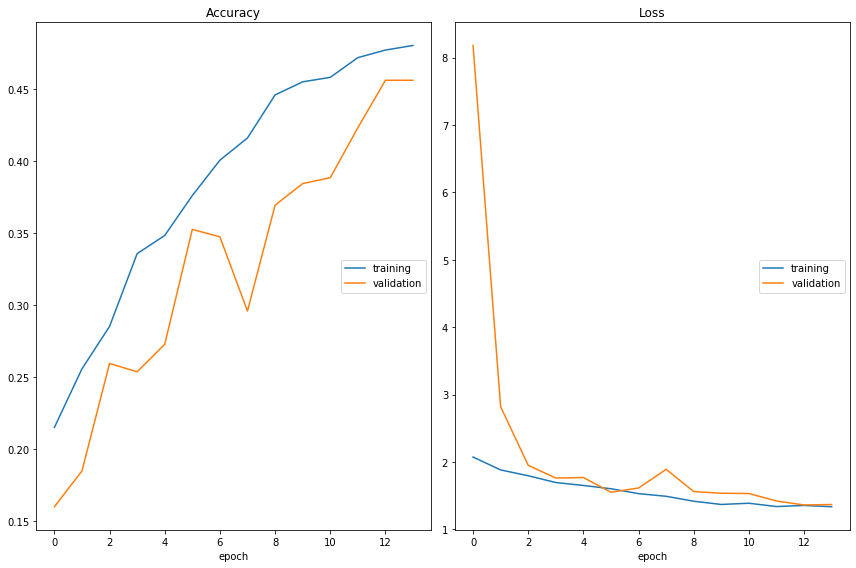

Accuracy
	training         	 (min:    0.215, max:    0.480, cur:    0.480)
	validation       	 (min:    0.160, max:    0.456, cur:    0.456)
Loss
	training         	 (min:    1.337, max:    2.074, cur:    1.337)
	validation       	 (min:    1.363, max:    8.180, cur:    1.370)

Epoch 00014: saving model to model_weights.h5
45/45 [==============================] - 61s 1s/step - loss: 1.3370 - acc: 0.4802 - val_loss: 1.3700 - val_acc: 0.4560
Epoch 15/15
44/45 [============================>.] - ETA: 1s - loss: 1.3008 - acc: 0.4975

In [ ]:


epochs = 15
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

callbacks = [PlotLossesKeras(), checkpoint, reduce_lr]

history = model.fit(
        x= train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks
)